In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


In [2]:
# importing the dataset
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Identify the independent variables x.
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# Encode the dependent variable y such that ‘Iris-setosa' is encoded
# as 0, and 'Iris-versicolor' and 'Iris-virginica' are both encoded as 1.
y = (iris_data['Species'] != 'Iris-setosa').astype(int)
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [4]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=0)

# Use sklearn’s logistic regression function to fit a model and make
# predictions on the test set.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
print(y_pred)


[1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 0 1]


[[38  0]
 [ 0 75]]


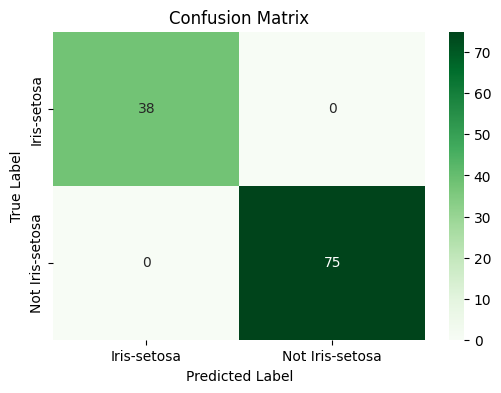

In [5]:
# Use sklearn to generate a confusion matrix, which compares the
# predicted labels to the actual labels (gold labels).
cm_data = confusion_matrix(y_test, y_pred)
print(cm_data)
plt.figure(figsize=(6,4))
# I am using tick labels here to help make the graph easier to interpret
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Greens', xticklabels=['Iris-setosa', 'Not Iris-setosa'], yticklabels=['Iris-setosa', 'Not Iris-setosa'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('/Users/ella/Desktop/DS/confusion_matrix_iris')
plt.show()


Precision is defined as the proportion of predictions of the positive class that is correct; and recall is defined as a measure of how many instances of a class the model was able to recognise. Precision can be calculated as TP/TP+FP and recall can be calculated as TP/TP+FN. Since there are no false positives or false negatives, the model should have very similar precision and recall.

In [6]:
# Write your own code to calculate the accuracy, precision, and recall, and check whether your prediction was right.
# Use score method to get accuracy of model
from sklearn.metrics import precision_score, recall_score

score = log_reg.score(X_test, y_test)
print(f'Accuracy: {score}')

# Calculate the precision score
prec_score = precision_score(y_test, y_pred)
print(f'Precision: {prec_score}')

# Calculate the recall score
rec_score = recall_score(y_test, y_pred)
print(f'Recall Score: {rec_score}')

Accuracy: 1.0
Precision: 1.0
Recall Score: 1.0
